In [ ]:
from bs4 import BeautifulSoup
import requests
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba.analyse as analyse

# 掛上headers模擬使用者讀取網頁的行為 (主要用意是部分網站會有反機器人爬蟲機制)
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}

# 目標網站
url = 'https://www.pttweb.cc/hot/all/today'
# 發出 get請求
resp = requests.get(url, headers=headers)
# 網頁編碼
resp.encoding = 'utf-8'
# 透過 美麗的湯 進行網頁解析
soup = BeautifulSoup(resp.text, 'html.parser')
# 找出所有 div區塊中 帶有目標class名的元素
divs = soup.find_all('class', 'e7-show-if-device-is-xs')
# 新增個list存取爬下來的內容
articles = []
# 換個網頁爬文章內容
root = 'https://www.ptt.cc'
for div in divs:
    link = div.find('a')['href']
    title = div.find('span', 'e7-show-if-device-is-not-xs').text
    articles.append({
        'title':title.replace('\u3000', ' '),
        'link':root + link + '.html'
    })

for article in articles:
    res = requests.get(article['link'], headers = {'cookie': 'over18=1;'})
    if res.status_code == 404:
        articles.remove(article)
    else:
        soup = BeautifulSoup(res.text, 'lxml')
        main = soup.find('div', id='main-content')
        main_tag = main.find_all('div', class_='push')
        # 新增一個位置存取文章的推文內容
        comment = []

        for i in main_tag:
            # 如果沒有推文就跳過
            if not i.find('span', 'push-tag'):
                continue
            # 把: 標點符號替換掉    
            push_content = i.find('span', 'push-content').text.replace(': ',"")
            # 推文內容存入
            comment.append(push_content)
    
        article['content'] = comment

jieba.set_dictionary('dict.txt.big')

# 抓前十篇熱門新聞製作文字雲
for article in articles[:10]:
    content_text = article['content']
    content_list = " ".join(content_text)
    tfidf_fre = jieba.analyse.extract_tags(content_list, topK=100, withWeight=True, allowPOS=(),withFlag=True)
    
    # 把分析完的詞頻輸出成字典
    count_dic = {}
    for i in range(len(tfidf_fre)):
        count_dic[tfidf_fre[i][0]] = tfidf_fre[i][1]
    # 把字典交給wordcloud做成文字雲
    myWordClode = WordCloud(
                       width=1200, # 圖的寬度
                       height=600,      # 圖的長度
                       background_color="black",  # 背景顏色 預設是白色
                       colormap="Dark2",
                       font_path='SourceHanSansTW-Regular.otf' # 輸出字體 必須將字體的檔案放在同個資料夾下
                        ).fit_words(count_dic)
    # 用PIL顯示文字雲
    plt.figure(figsize=(8, 6), dpi=100) 
    plt.imshow(myWordClode)
    plt.axis("off")
    print(article['title'])
    print(article['link'])
    plt.show()

Building prefix dict from C:\Users\user\dict.txt.big.txt ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.u645e8f4c3877095969c8eb1dd7262940.cache
Loading model cost 1.210 seconds.
Prefix dict has been built successfully.


Re: [新聞] 議員批高虹安就近入學跳票 市府指不能倉促變動
https://www.ptt.cc/bbs/Gossiping/M.1675579368.A.982.html


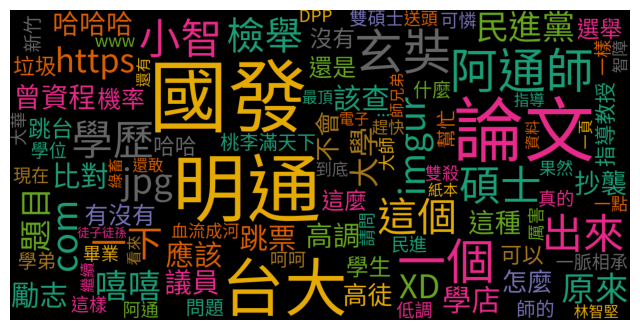

[爆卦] 星雲大師圓寂
https://www.ptt.cc/bbs/Gossiping/M.1675607070.A.6ED.html


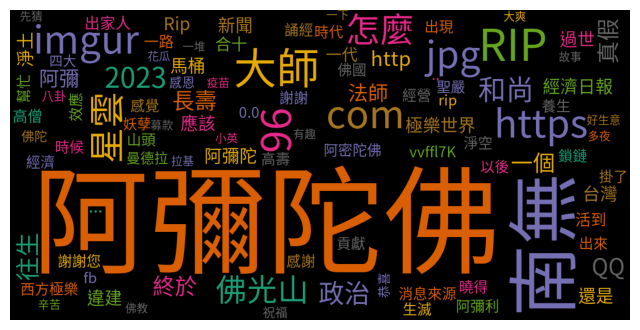

[新聞] 快訊／鹽水蜂炮傳意外「累計12人受傷」！13歲少年左眼遭炸急送醫
https://www.ptt.cc/bbs/Gossiping/M.1675605095.A.401.html


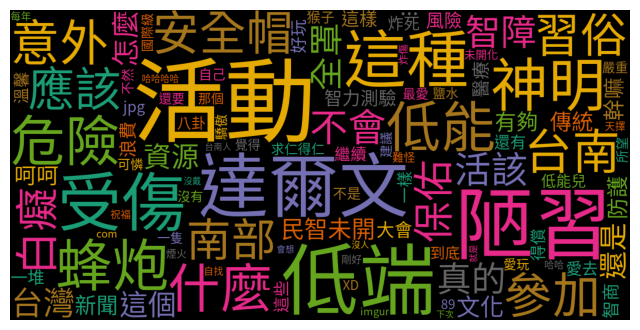

[新聞] 中國教授發文鼓吹攻台 留言區逆風灌爆「您兒孫先上戰場」
https://www.ptt.cc/bbs/Gossiping/M.1675644859.A.919.html


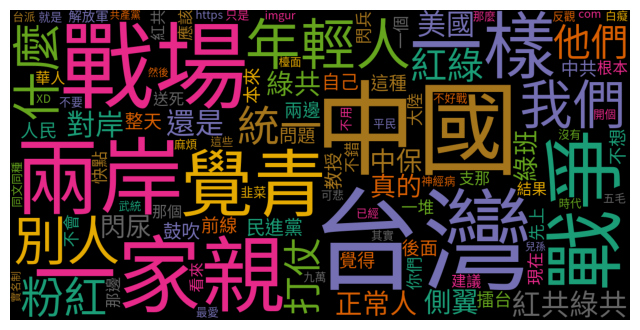

[新聞] 痛批徐巧芯沒水準 秦慧珠：國民黨不該被「亂叫小雞」牽著鼻子走
https://www.ptt.cc/bbs/Gossiping/M.1675592339.A.4A2.html


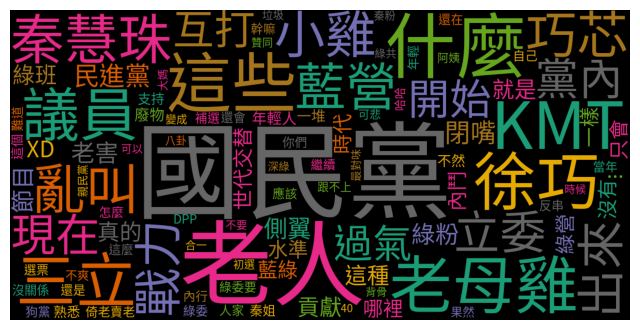

[新聞] 陸軍營區春宮女主角心死將離開部隊 她身世其實有點坎坷
https://www.ptt.cc/bbs/Gossiping/M.1675579711.A.AB9.html


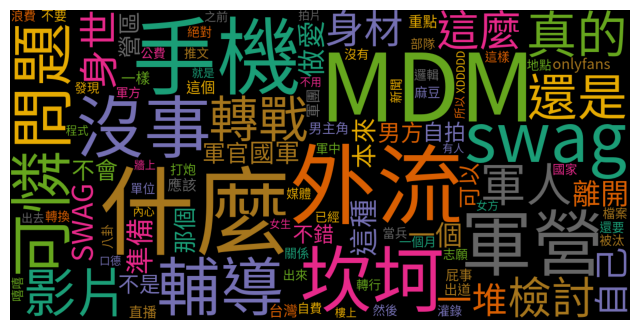

[爆卦] 土耳其7.8強震
https://www.ptt.cc/bbs/Gossiping/M.1675648386.A.A55.html


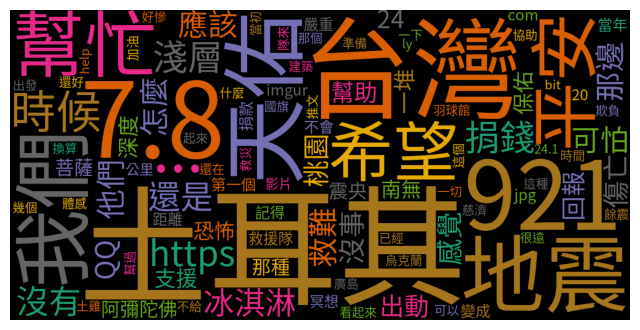

[新聞] 反對孤注一擲電動車，豐田：時間將證明我們是對的
https://www.ptt.cc/bbs/Gossiping/M.1675605702.A.41A.html


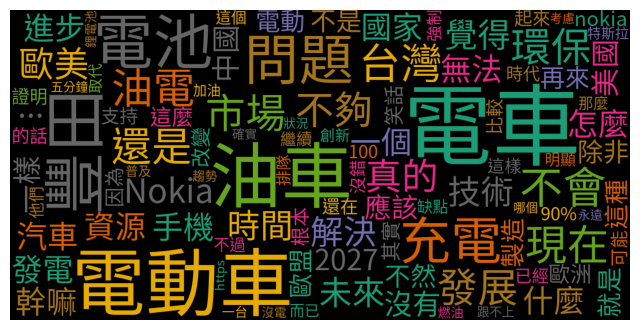

[新聞] 正妹當家政婦月薪15萬！僱主真實目的是這個 她拒絕竟被爆是「飯局妹」
https://www.ptt.cc/bbs/Gossiping/M.1675570774.A.6EB.html


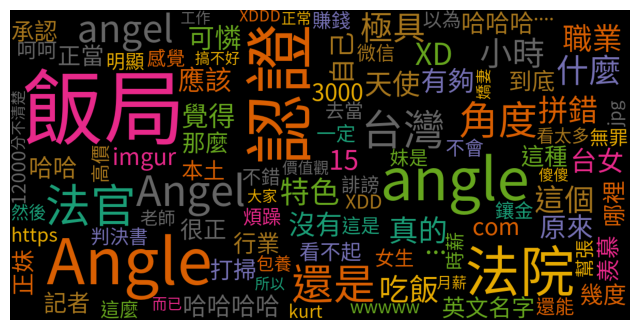

[新聞] 獨／沒水準！鹿耳門聖母廟狂歡夜後 志工走上街頭傻眼了
https://www.ptt.cc/bbs/Gossiping/M.1675649629.A.B2B.html


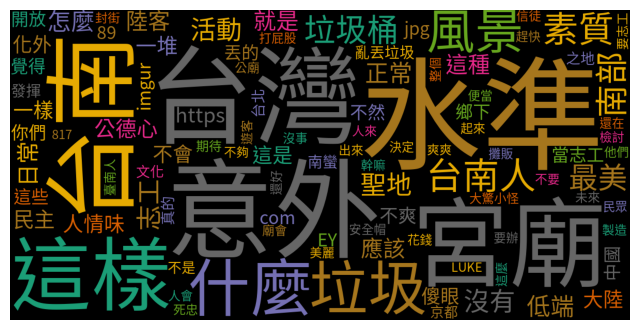

In [13]:
from bs4 import BeautifulSoup
import requests
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba.analyse as analyse

# 掛上headers模擬使用者讀取網頁的行為 (主要用意是部分網站會有反機器人爬蟲機制)
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.92 Safari/537.36'}

# 目標網站
url = 'https://www.pttweb.cc/hot/news/today'
# 發出 get請求
resp = requests.get(url, headers=headers)
# 網頁編碼
resp.encoding = 'utf-8'
# 透過 美麗的湯 進行網頁解析
soup = BeautifulSoup(resp.text, 'html.parser')
# 找出所有 div區塊中 帶有目標class名的元素
divs = soup.find_all('div', 'e7-right-top-container e7-no-outline-all-descendants')
# 新增個list存取爬下來的內容
articles = []
# 換個網頁爬文章內容
root = 'https://www.ptt.cc'
for div in divs:
    link = div.find('a')['href']
    title = div.find('span', 'e7-show-if-device-is-not-xs').text
    articles.append({
        'title':title.replace('\u3000', ' '),
        'link':root + link + '.html'
    })
for article in articles:
    res = requests.get(article['link'], headers = {'cookie': 'over18=1;'})
    if res.status_code == 404:
        articles.remove(article)
    else:
        soup = BeautifulSoup(res.text, 'lxml')
        main = soup.find('div', id='main-content')
        main_tag = main.find_all('div', class_='push')
        # 新增一個位置存取文章的推文內容
        comment = []

        for i in main_tag:
            # 如果沒有推文就跳過
            if not i.find('span', 'push-tag'):
                continue
            # 把: 標點符號替換掉    
            push_content = i.find('span', 'push-content').text.replace(': ',"")
            # 推文內容存入
            comment.append(push_content)
    
        article['content'] = comment

jieba.set_dictionary('dict.txt.big.txt')

# 抓前十篇熱門新聞製作文字雲
for article in articles[:10]:
    content_text = article['content']
    content_list = " ".join(content_text)
    tfidf_fre = jieba.analyse.extract_tags(content_list, topK=100, withWeight=True, allowPOS=(),withFlag=True)
    
    # 把分析完的詞頻輸出成字典
    count_dic = {}
    for i in range(len(tfidf_fre)):
        count_dic[tfidf_fre[i][0]] = tfidf_fre[i][1]
    # 把字典交給wordcloud做成文字雲
    myWordClode = WordCloud(
                       width=1200, # 圖的寬度
                       height=600,      # 圖的長度
                       background_color="black",  # 背景顏色 預設是白色
                       colormap="Dark2",
                       font_path='SourceHanSansTW-Regular.otf' # 輸出字體 必須將字體的檔案放在同個資料夾下
                        ).fit_words(count_dic)
    # 用PIL顯示文字雲
    plt.figure(figsize=(8, 6), dpi=100) 
    plt.imshow(myWordClode)
    plt.axis("off")
    print(article['title'])
    print(article['link'])
    plt.show()

In [5]:
pip install jieba

Note: you may need to restart the kernel to use updated packages.
     -------------------------------------- 19.2/19.2 MB 301.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for jieba: filename=jieba-0.42.1-py3-none-any.whl size=19314459 sha256=966d187a82f57db2bea6981a3730ddade19b8c501348bf0fd0f72e71a195cc85
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\7d\74\cf\08c94db4b784e2c1ef675a600b7b5b281fd25240dcb954ee7e
Successfully built jieba


In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install bs4

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=d8209c9788df2fb7390899a208cc6285281d8d57bcb5fafd1c51bffb668345c0
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\73\2b\cb\099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.
